In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cereal.csv')


In [3]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
df["mfr"].value_counts()

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64

In [5]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [46]:
def map_manufacturer(mfr_code):
    manufacturer_dict = {
        'A': 'American Home Food Products',
        'G': 'General Mills',
        'K': 'Kelloggs',
        'N': 'Nabisco',
        'P': 'Post',
        'Q': 'Quaker Oats',
        'R': 'Ralston Purina'
    }
    
    return manufacturer_dict.get(mfr_code, 'Unknown')

df['manufacturer_name'] = df['mfr'].apply(map_manufacturer)


In [47]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Ralston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Ralston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills


# Calorie distribution


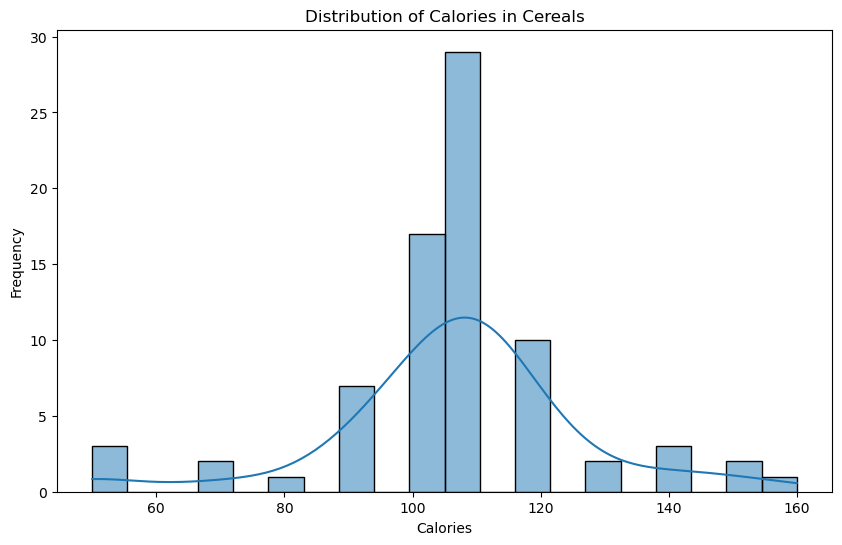

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['calories'], bins=20, kde=True)
plt.title('Distribution of Calories in Cereals')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Protein content analysis
# Mean and standard deviation of protein content

In [9]:
avg_protein = df['protein'].mean()
std_protein = df['protein'].std()
print(f'Average Protein: {avg_protein:.2f} g, Standard Deviation: {std_protein:.2f} g')

Average Protein: 2.55 g, Standard Deviation: 1.09 g


# Fiber content analysis
# Compare fiber intake to calories

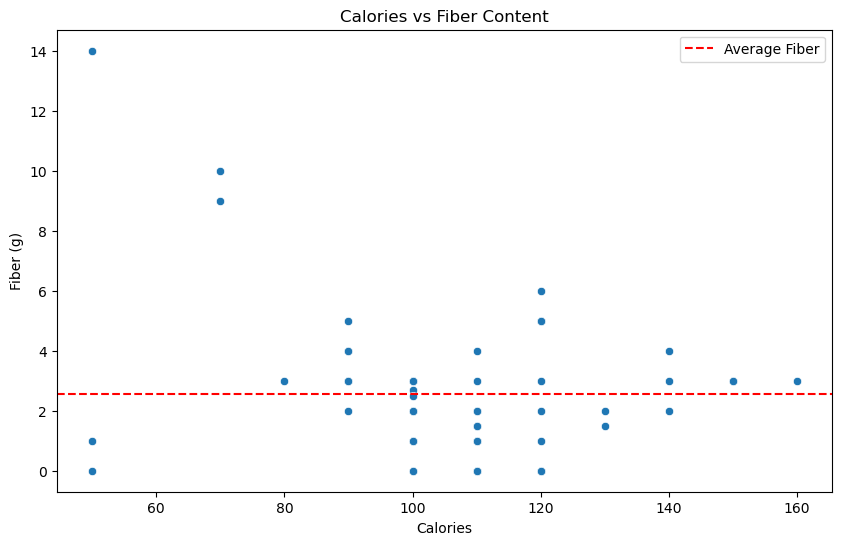

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories', y='fiber')
plt.title('Calories vs Fiber Content')
plt.xlabel('Calories')
plt.ylabel('Fiber (g)')
plt.axhline(y=avg_protein, color='r', linestyle='--', label='Average Fiber')
plt.legend()
plt.show()

In [13]:
fig = px.box(df, x='sugars', 
             title='Distribution of Sugar Content in Cereals',
             labels={'sugars': 'Sugars (g)'},
             color_discrete_sequence=['skyblue'])

mean_sugars = df['sugars'].mean()
fig.add_shape(type='line', 
              x0=mean_sugars, y0=0, x1=mean_sugars, y1=1,
              line=dict(color='orange', width=2, dash='dash'))

fig.add_annotation(x=mean_sugars, y=0.05, 
                   text='Mean Sugar Content', showarrow=True, arrowhead=2)

fig.show()

# Number of species per company


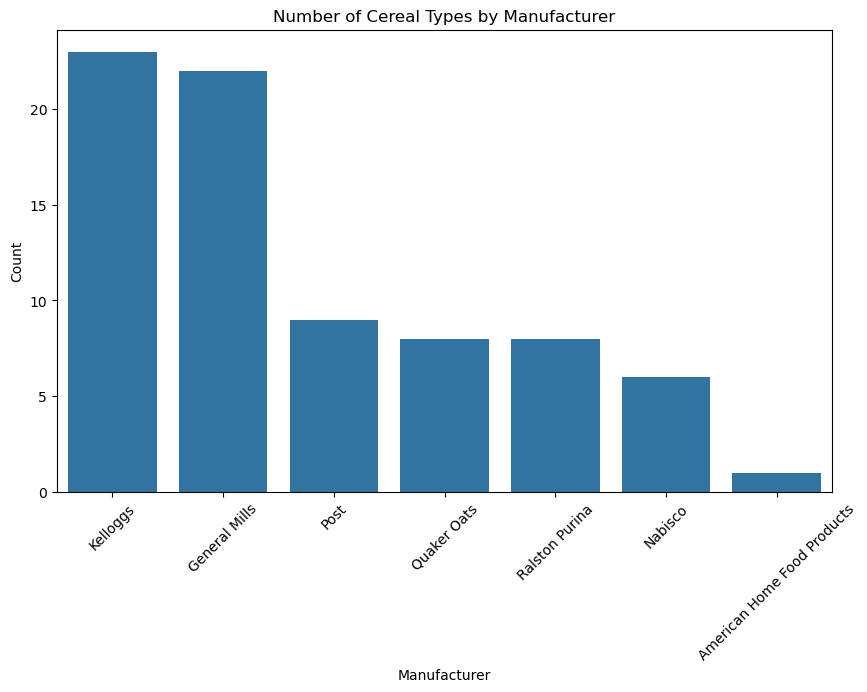

In [14]:
manufacturer_counts = df['manufacturer_name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=manufacturer_counts.index, y=manufacturer_counts.values)
plt.title('Number of Cereal Types by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [23]:
average_ratings = df.groupby('manufacturer_name')['rating'].mean().reset_index()
average_ratings.rename(columns={'rating': 'average_rating'}, inplace=True)
fig = px.bar(average_ratings, x='manufacturer_name', y='average_rating',
             title='Average Cereal Ratings by Manufacturer',
             labels={'manufacturer_name': 'Manufacturer', 'average_rating': 'Average Rating'},
             color='average_rating',
             color_continuous_scale=px.colors.sequential.Blues)

fig.update_layout(xaxis_tickangle=-45)

fig.show()

# Comparison of types (cold vs. hot) in calories


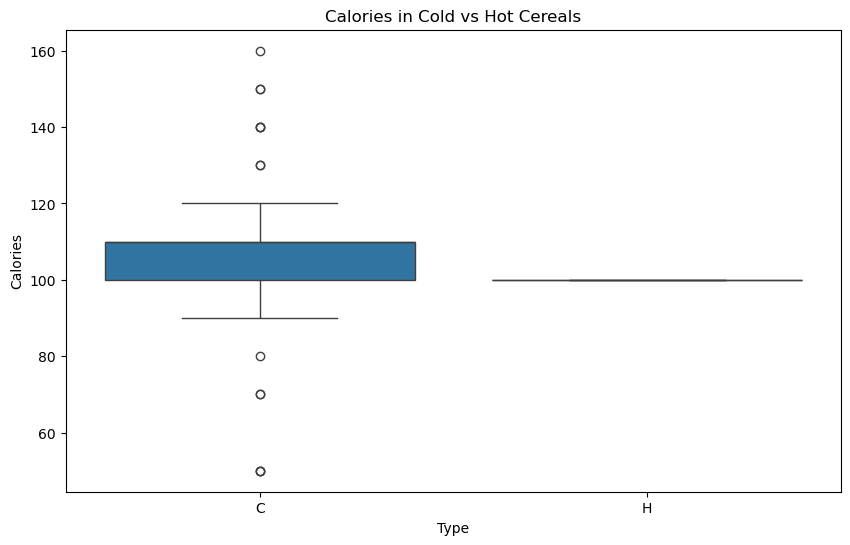

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='calories', data=df)
plt.title('Calories in Cold vs Hot Cereals')
plt.xlabel('Type')
plt.ylabel('Calories')
plt.show()

In [17]:
df["type"].value_counts()

type
C    74
H     3
Name: count, dtype: int64

# Fat distribution


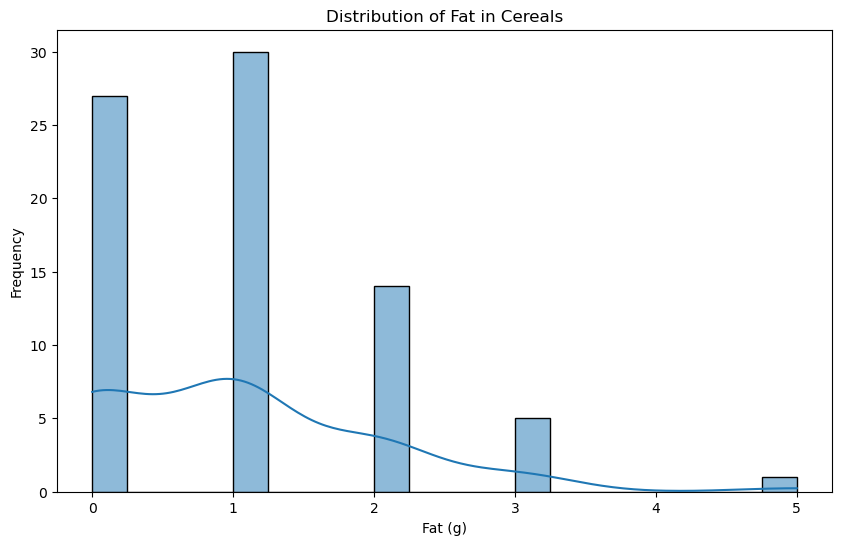

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['fat'], bins=20, kde=True)
plt.title('Distribution of Fat in Cereals')
plt.xlabel('Fat (g)')
plt.ylabel('Frequency')
plt.show()

# Ranking of products based on average vitamin content and extraction of the top 20 products

                                 name  average_vitamins
38        Just Right Crunchy  Nuggets             100.0
71                  Total Whole Grain             100.0
69                  Total Corn Flakes             100.0
70                  Total Raisin Bran             100.0
53                         Product 19             100.0
39             Just Right Fruit & Nut             100.0
41                               Life              25.0
40                                Kix              25.0
37                         Honey-comb              25.0
51               Oatmeal Raisin Crisp              25.0
43                              Maypo              25.0
44   Muesli Raisins; Dates; & Almonds              25.0
45  Muesli Raisins; Peaches; & Pecans              25.0
46               Mueslix Crispy Blend              25.0
47               Multi-Grain Cheerios              25.0
48                   Nut&Honey Crunch              25.0
49          Nutri-Grain Almond-Raisin           

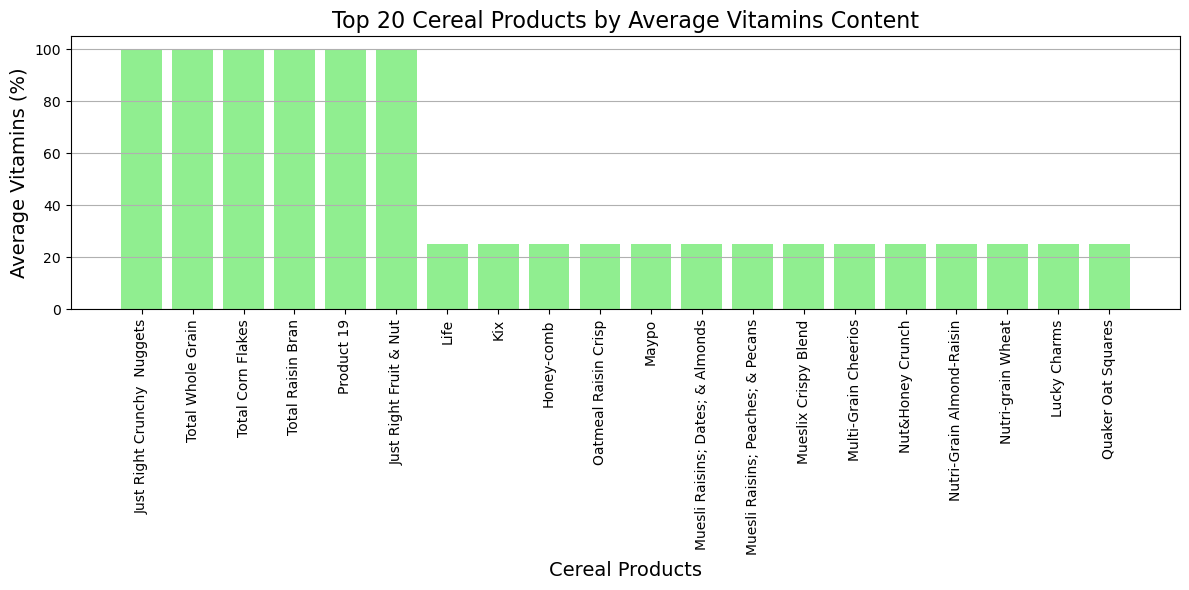

In [25]:
average_vitamins = df.groupby('name')['vitamins'].mean().reset_index()
average_vitamins.rename(columns={'vitamins': 'average_vitamins'}, inplace=True)
top_20_vitamins = average_vitamins.sort_values(by='average_vitamins', ascending=False).head(20)
print(top_20_vitamins)
plt.figure(figsize=(12, 6))
plt.bar(top_20_vitamins['name'], top_20_vitamins['average_vitamins'], color='lightgreen')
plt.title('Top 20 Cereal Products by Average Vitamins Content', fontsize=16)
plt.xlabel('Cereal Products', fontsize=14)
plt.ylabel('Average Vitamins (%)', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate the average sugar content of each type of cereal


Average Sugar Content by Type of Cereal:
  type  average_sugar
0    C       7.175676
1    H       0.666667


C:\Users\body4\AppData\Local\Temp\ipykernel_19848\159578433.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




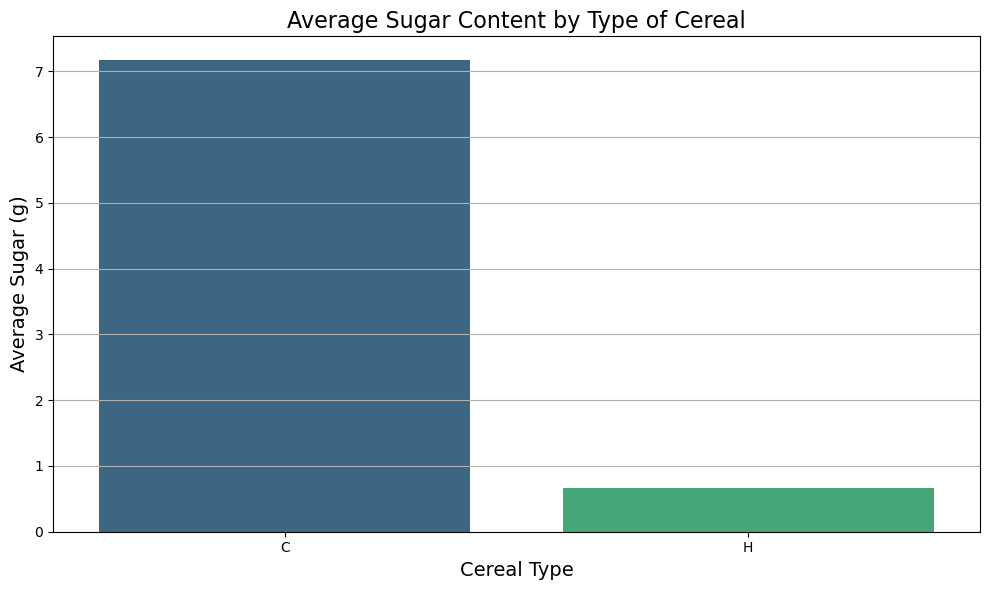

In [28]:
average_sugar = df.groupby('type')['sugars'].mean().reset_index()
average_sugar.rename(columns={'sugars': 'average_sugar'}, inplace=True)
print("Average Sugar Content by Type of Cereal:")
print(average_sugar)
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='average_sugar', data=average_sugar, palette='viridis')
plt.title('Average Sugar Content by Type of Cereal', fontsize=16)
plt.xlabel('Cereal Type', fontsize=14)
plt.ylabel('Average Sugar (g)', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Analysis of high-sugar grains


In [29]:
high_sugar_threshold = 10  
high_sugar_cereals = df[df['sugars'] > high_sugar_threshold]
print("\nHigh Sugar Cereals (> 10g of sugar):")
print(high_sugar_cereals[['name', 'sugars', 'calories']])


High Sugar Cereals (> 10g of sugar):
                                 name  sugars  calories
6                         Apple Jacks      14       110
10                       Cap'n'Crunch      12       120
14                        Cocoa Puffs      13       110
17                          Corn Pops      12       110
18                      Count Chocula      13       110
24                        Froot Loops      13       110
25                     Frosted Flakes      11       110
28                      Fruitful Bran      12       120
29                     Fruity Pebbles      12       110
30                       Golden Crisp      15       100
35                   Honey Graham Ohs      11       120
37                         Honey-comb      11       110
42                       Lucky Charms      12       110
44   Muesli Raisins; Dates; & Almonds      11       150
45  Muesli Raisins; Peaches; & Pecans      11       150
46               Mueslix Crispy Blend      13       160
52        

C:\Users\body4\AppData\Local\Temp\ipykernel_19848\2873901482.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




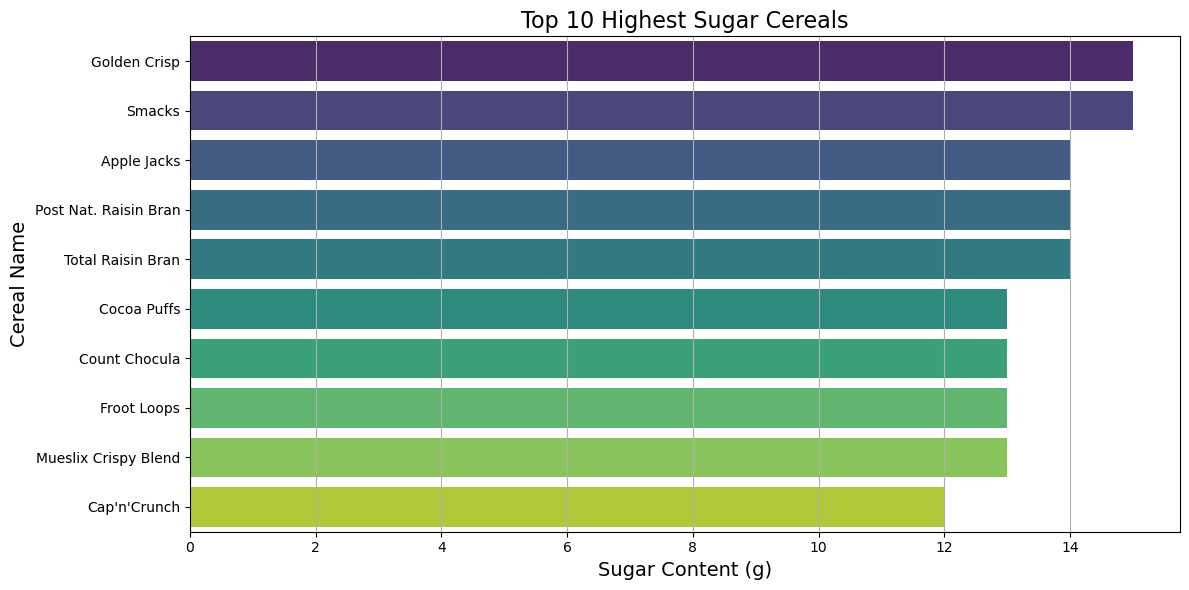

In [31]:
top_10_high_sugar = high_sugar_cereals.nlargest(10, 'sugars')
plt.figure(figsize=(12, 6))
sns.barplot(x='sugars', y='name', data=top_10_high_sugar, palette='viridis')
plt.title('Top 10 Highest Sugar Cereals', fontsize=16)
plt.xlabel('Sugar Content (g)', fontsize=14)
plt.ylabel('Cereal Name', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


C:\Users\body4\AppData\Local\Temp\ipykernel_19848\487678573.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




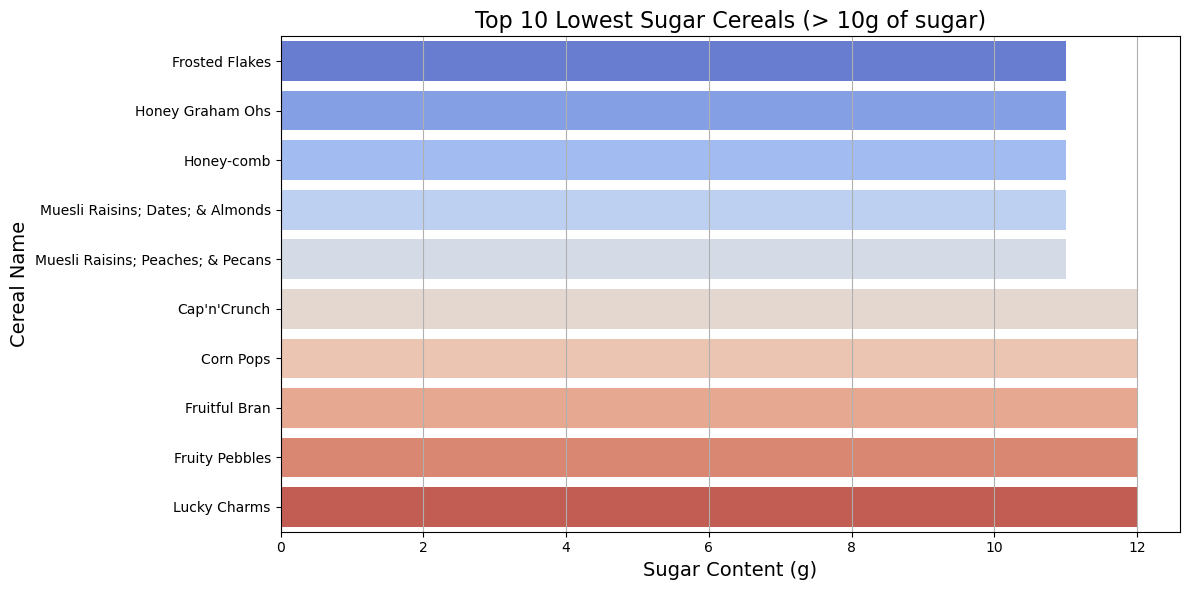

In [32]:
bottom_10_high_sugar = high_sugar_cereals.nsmallest(10, 'sugars')
plt.figure(figsize=(12, 6))
sns.barplot(x='sugars', y='name', data=bottom_10_high_sugar, palette='coolwarm')
plt.title('Top 10 Lowest Sugar Cereals (> 10g of sugar)', fontsize=16)
plt.xlabel('Sugar Content (g)', fontsize=14)
plt.ylabel('Cereal Name', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

C:\Users\body4\AppData\Local\Temp\ipykernel_19848\1207551699.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




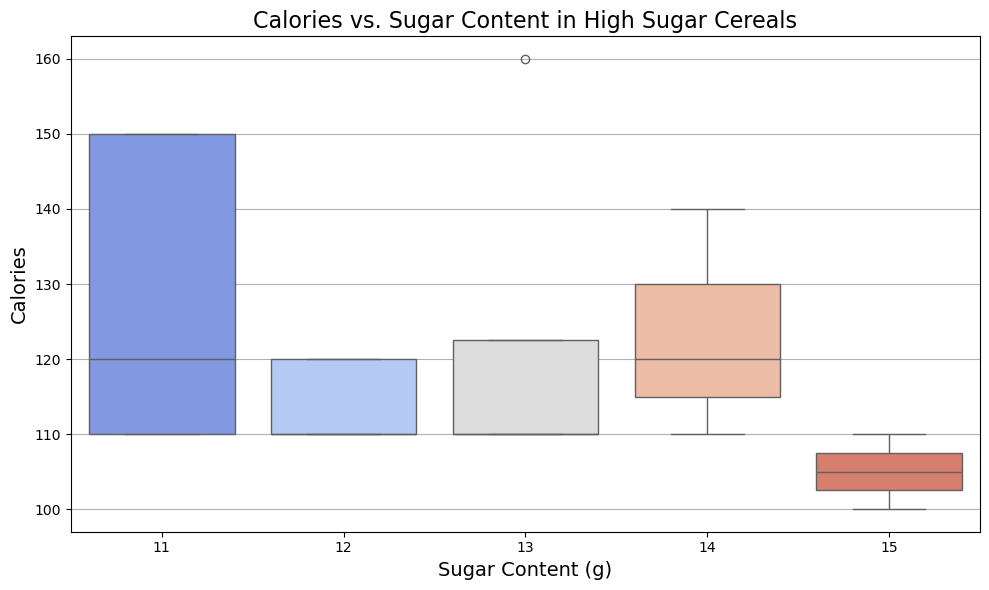

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sugars', y='calories', data=high_sugar_cereals, palette='coolwarm')
plt.title('Calories vs. Sugar Content in High Sugar Cereals', fontsize=16)
plt.xlabel('Sugar Content (g)', fontsize=14)
plt.ylabel('Calories', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Top 10 Products with Highest Average Vitamins:
                           name  vitamins
38  Just Right Crunchy  Nuggets     100.0
39       Just Right Fruit & Nut     100.0
53                   Product 19     100.0
69            Total Corn Flakes     100.0
70            Total Raisin Bran     100.0
71            Total Whole Grain     100.0
0                     100% Bran      25.0
2                      All-Bran      25.0
3     All-Bran with Extra Fiber      25.0
4                Almond Delight      25.0


C:\Users\body4\AppData\Local\Temp\ipykernel_19848\2357479530.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




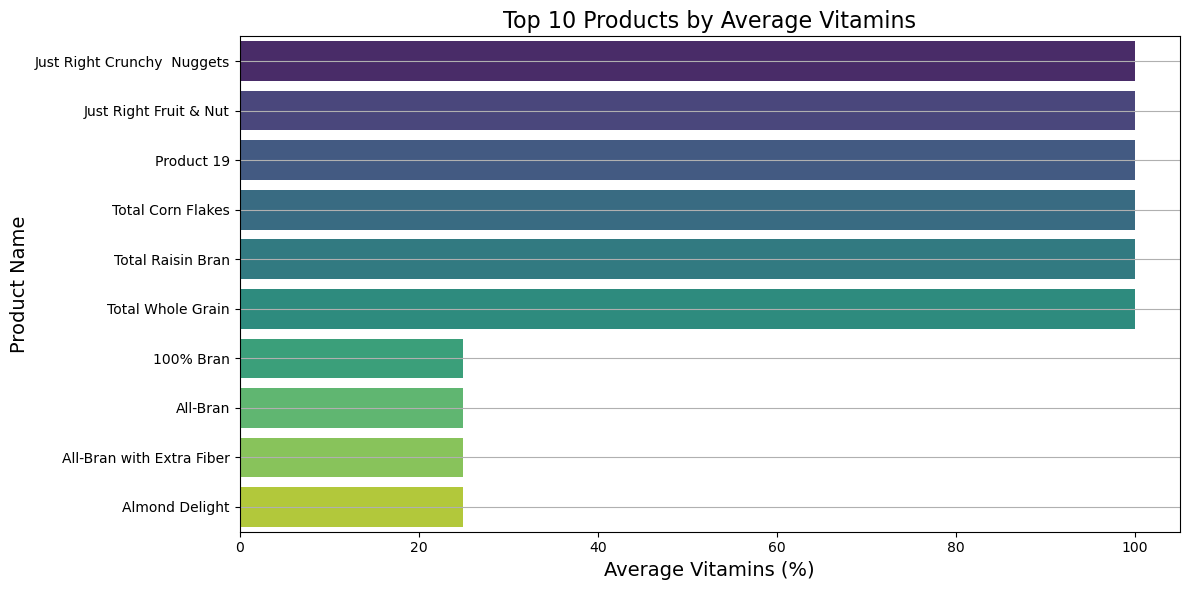

In [42]:
average_vitamins = df.groupby('name')['vitamins'].mean().reset_index()
top10_average_vitamins = average_vitamins.nlargest(10, 'vitamins')
print("Top 10 Products with Highest Average Vitamins:")
print(top10_average_vitamins)
plt.figure(figsize=(12, 6))
sns.barplot(x='vitamins', y='name', data=top10_average_vitamins, palette='viridis')
plt.title('Top 10 Products by Average Vitamins', fontsize=16)
plt.xlabel('Average Vitamins (%)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Recommended Cereals that Meet Daily Vitamin Needs:
                           name manufacturer_name  vitamins
38  Just Right Crunchy  Nuggets          Kelloggs       100
39       Just Right Fruit & Nut          Kelloggs       100
53                   Product 19          Kelloggs       100
69            Total Corn Flakes     General Mills       100
70            Total Raisin Bran     General Mills       100
71            Total Whole Grain     General Mills       100


C:\Users\body4\AppData\Local\Temp\ipykernel_19848\3100592998.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




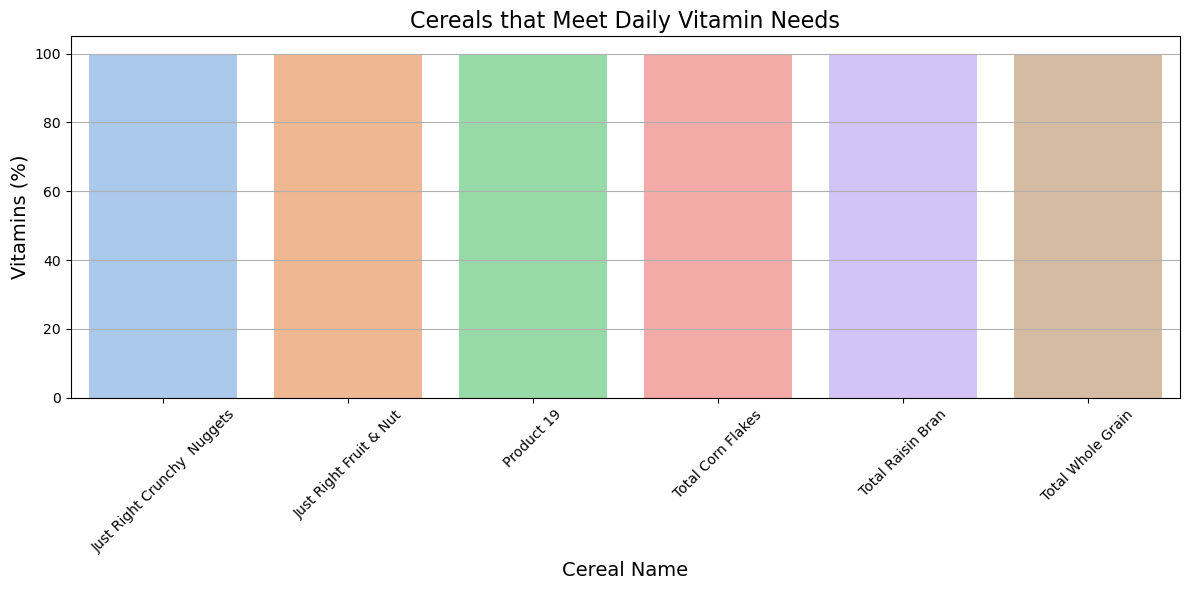

In [49]:
recommended_cereals = df[df['vitamins'] == 100]
print("\nRecommended Cereals that Meet Daily Vitamin Needs:")
print(recommended_cereals[['name', 'manufacturer_name', 'vitamins']])
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='vitamins', data=recommended_cereals, palette='pastel')
plt.title('Cereals that Meet Daily Vitamin Needs', fontsize=16)
plt.xlabel('Cereal Name', fontsize=14)
plt.ylabel('Vitamins (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [44]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [48]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,manufacturer_name
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Ralston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,General Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,General Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Ralston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,General Mills
